# Pregunta 1
Cargue la base de datos bike.csv. Realice las siguientes procesos de limpieza

Transforme a factor las variables categóricas.
Transforme las variables temp y atemp a grados celsius, ya que se encuentran en escala normalizada. Use las siguientes fórmulas respectivamente:
(47*temp-8).
(66*atemp-16).
Transforme la variable humedad a porcentaje (multiplique la variable por 100).
Transforme la velocidad del viento a millas por hora (multiplique por 67 el valor de la variable normalizada).

In [1]:
# Importar pandas
import pandas as pd

In [4]:
# Cargar base de datos bike.csv
data_bikes = pd.read_csv('data/bikes.csv')

In [8]:
print('Shape')
data_bikes.shape

Shape


(731, 14)

In [9]:

print('__________')
print('Info')
data_bikes.info()

__________
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        731 non-null    object 
 1   season      731 non-null    int64  
 2   year        731 non-null    int64  
 3   month       731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weather     731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  humidity    731 non-null    float64
 11  windspeed   731 non-null    float64
 12  registered  731 non-null    int64  
 13  Target      731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


In [11]:
# Transforme a factor las variables categóricas.
categorical_vars = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather']
for var in categorical_vars:
    data_bikes[var] = data_bikes[var].astype('category')


In [12]:
data_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   date        731 non-null    object  
 1   season      731 non-null    category
 2   year        731 non-null    category
 3   month       731 non-null    category
 4   holiday     731 non-null    category
 5   weekday     731 non-null    category
 6   workingday  731 non-null    category
 7   weather     731 non-null    category
 8   temp        731 non-null    float64 
 9   atemp       731 non-null    float64 
 10  humidity    731 non-null    float64 
 11  windspeed   731 non-null    float64 
 12  registered  731 non-null    int64   
 13  Target      731 non-null    int64   
dtypes: category(7), float64(4), int64(2), object(1)
memory usage: 46.5+ KB


In [15]:
# Cambiar a fecha variable 'date' a formato datetime año-mes-día
data_bikes['date'] = pd.to_datetime(data_bikes['date'], format='%Y-%m-%d')

In [16]:
# Nuevo info con data como fecha
data_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   year        731 non-null    category      
 3   month       731 non-null    category      
 4   holiday     731 non-null    category      
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weather     731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  humidity    731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  registered  731 non-null    int64         
 13  Target      731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(4), int64(2)
memory usage: 46.5 KB


In [19]:
# Transforme las variables temp y atemp a grados celsius, ya que se encuentran en escala normalizada
data_bikes['temp'] = 47 * data_bikes['temp'] -8 #Transformación temperatura
data_bikes['atemp'] = 66 * data_bikes['atemp'] -16 #Transformación sensación térmica

In [20]:
# Transforme la variable humedad a porcentaje (multiplique la variable por 100)
data_bikes['humidity'] = data_bikes['humidity'] * 100

In [21]:
# Transforme la velocidad del viento a millas por hora 
# (multiplique por 67 el valor de la variable normalizada)
data_bikes['windspeed'] = data_bikes['windspeed'] * 67

# Pregunta 2
Realice un gráfico del número de arriendos de bicicletas vs temperatura, además, añada una curva de regresión lineal. ¿Cuál es la relación entre el número de arriendos con la temperatura?



In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

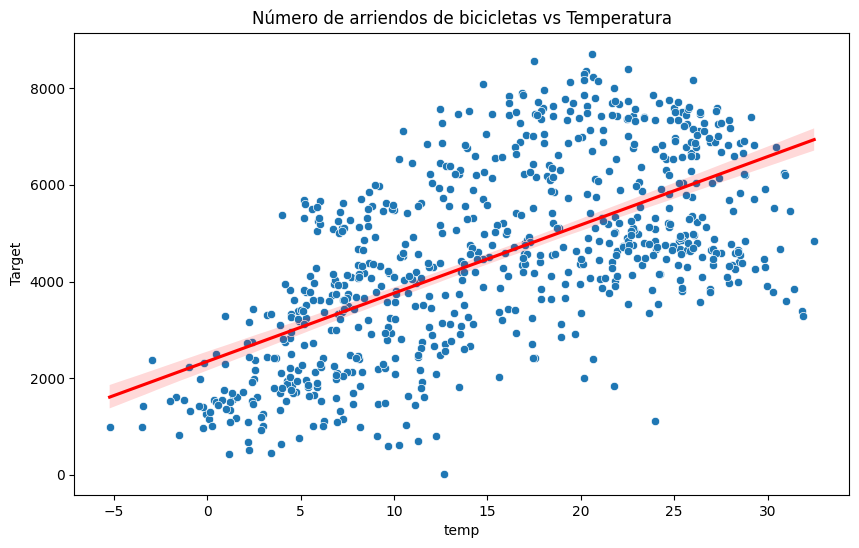

In [23]:
# Realizar el gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_bikes, x='temp', y='Target')
sns.regplot(data=data_bikes, x='temp', y='Target', scatter=False, color='red')  # Curva de regresión lineal
plt.title("Número de arriendos de bicicletas vs Temperatura")
plt.show()

## ¿Cuál es la relación entre el número de arriendos con la temperatura?
Al aumentar la temperatura, también aumenta la cantidad de arriendos. La curva de regresión lineal demuestra que existe esa tendencia entre el aumento de temperatura y arriendos de bicicletas. Encontrando una mayor incertidumbre en los extremos de menor o mayor temperatura, lo que parece creíble ante la experiencia que con menos de 5 grados o más de 30 las personas pueden tener menos ganas de salir a andar en bicicleta 